# Credit Card Default Study

## 0. Necessary Library

In [1]:
# Operating System
import os

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from collections import OrderedDict
pd.set_option('display.max_columns', 500)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score, recall_score, precision_score

/home/victor/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## 1. Data Preparation

In [2]:
dir = os.getcwd()
os.listdir(dir)

['install.sh',
 'autopep8magic.py',
 'autopep8magic.py~',
 'gitignore',
 'DefaultRecord_Person.csv',
 '.ipynb_checkpoints',
 'install.sh~',
 'Workbook.ipynb',
 'technical_case',
 'DefaultRecord_History.csv']

In [3]:
history_path = os.path.join(dir, 'DefaultRecord_History.csv')
person_path = os.path.join(dir, 'DefaultRecord_Person.csv')

In [4]:
history = pd.read_csv(history_path)
person = pd.read_csv(person_path)

In [6]:
history.set_index(history['ID'])
del history['ID']

In [7]:
person.set_index(person['ID'])
del person['ID']

In [8]:
result = pd.concat([history, person], axis = 1, join = 'inner')

In [40]:
print(history.shape)
print(person.shape)
print(result.shape)

(30000, 13)
(30000, 11)
(30000, 24)


In [9]:
result.head(5)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,120000,2,2,2,26,-1,2,0,0,0,2
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,90000,2,2,2,34,0,0,0,0,0,0
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,50000,2,2,1,37,0,0,0,0,0,0
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,50000,1,2,1,57,-1,0,-1,0,0,0


### Data Understanding

In [10]:
data = result.copy()

In [11]:
data.columns

Index([u'BILL_AMT1', u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5',
       u'BILL_AMT6', u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4',
       u'PAY_AMT5', u'PAY_AMT6', u'default payment next month', u'LIMIT_BAL',
       u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE', u'PAY_0', u'PAY_2', u'PAY_3',
       u'PAY_4', u'PAY_5', u'PAY_6'],
      dtype='object')

### 2. Data Cleansing and Feature Engineering

In [12]:
data.describe(include = 'all')

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [13]:
corr = data.corr()

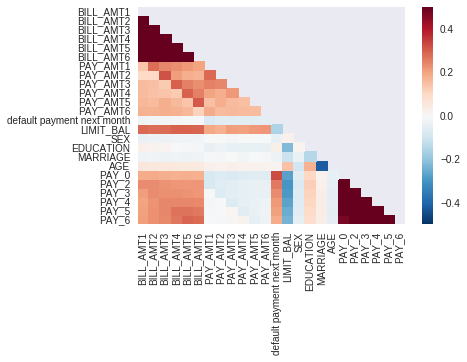

In [14]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, vmax=0.5)

In [15]:
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [16]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

### Education is labelled wrongly, fix Education by LIMIT_BAL
### Assumption: More educated people are earning higher income, thus have better credit limit

In [17]:
data[['LIMIT_BAL','EDUCATION']].groupby(['EDUCATION'], as_index=False).mean()

,EDUCATION,LIMIT_BAL
0,0,217142
1,1,212956
2,2,147062
3,3,126550
4,4,220894
5,5,168164
6,6,148235


### As we can see from the table, each valid education category has its mean LIMIT_BAL. It seems to be correct that more educated people tend to have higher credit limit. For every observation which has invalid education category, I am going to assign it a new education category whose mean LIMIT_BAL has the smallest absolute difference with its LIMIT_BAL

In [50]:
limit_mean_by_valid_edu = []
for i in range(1, 5):
    limit_mean_by_valid_edu.append(data[data['EDUCATION']==i]['LIMIT_BAL'].mean())

In [51]:
limit_mean_by_valid_edu

[212956.06991025034, 147062.4376336422, 126550.27049013626, 220894.30894308942]

In [52]:
def find_edu(num):
    edu = 1
    diff = abs(num - limit_mean_by_valid_edu[0])
    count = 1
    for i in limit_mean_by_valid_edu:
        if abs(num - i) <= diff:
            edu = count
            diff = abs(num - i)
            count += 1
        else:
            count += 1
    return edu

In [53]:
tmp = data[(data['EDUCATION']== 0) | (data['EDUCATION']> 4)][['LIMIT_BAL']]

In [54]:
edu = []
for index, row in tmp.iterrows():
    edu.append(find_edu(row['LIMIT_BAL']))

In [55]:
data['EDUCATION'][(data['EDUCATION']== 0) | (data['EDUCATION']> 4)] = np.asarray(edu)

### EDUCATION after transformation

In [56]:
data[['LIMIT_BAL','EDUCATION']].groupby(['EDUCATION'], as_index=False).count()

,EDUCATION,LIMIT_BAL
0,1,10620
1,2,14100
2,3,5060
3,4,220


### Same for 'MARRIAGE', 0 is not possible values. I assign all zeros to 3, which is the category for 'others'

In [57]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

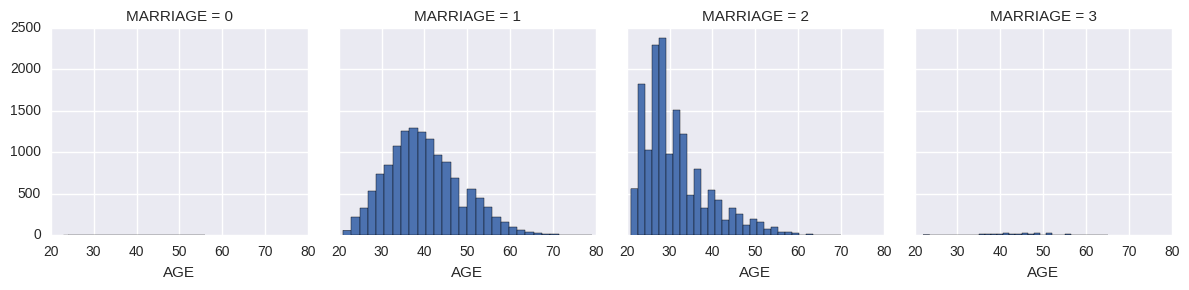

In [58]:
g = sns.FacetGrid(result, col='MARRIAGE')
g.map(plt.hist, 'AGE', bins=30)

In [59]:
data[['MARRIAGE', 'AGE']].groupby('MARRIAGE').mean()

,AGE
MARRIAGE,
0,37.814815
1,40.016692
2,31.452706
3,42.798762


In [60]:
data['MARRIAGE'][(data['MARRIAGE'] == 0) & (data['AGE'] < 30)] = 2

In [61]:
data['MARRIAGE'][(data['MARRIAGE'] == 0) & (data['AGE'] >= 30)] = 1

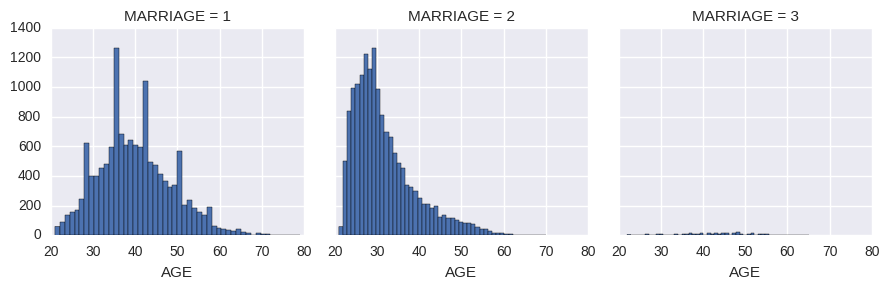

In [62]:
g = sns.FacetGrid(data, col='MARRIAGE')
g.despine(left='True')
g.map(plt.hist, 'AGE', bins=50)

### Treating Categorical Features

In [63]:
for variable_name in ['EDUCATION','MARRIAGE']:
    print 'Dummifying the {} variable ...'.format(variable_name)
    
    dummies = pd.get_dummies(data[variable_name])
    #### CREATE DUMMIES FROM THE COLUMN data[variable_name], as you did above with pd.get_dummies() ####
    
    dummies.columns = ['{}_{}'.format(variable_name,x) for x in dummies.columns]  
    # this will rename the column   # in an appropriate way
        
    data = pd.concat([data,dummies],axis=1)  # This will append the dummy column to the existing dataframe
    print 'Deleting {} variable ...'.format(variable_name)
    del data[variable_name]

Dummifying the EDUCATION variable ...
Deleting EDUCATION variable ...
Dummifying the MARRIAGE variable ...
Deleting MARRIAGE variable ...


### Data undersampling, to have a equal balance between default and normal
https://www.kaggle.com/joparga3/d/dalpozz/creditcardfraud/in-depth-skewed-data-classif-93-recall-acc-now

In [64]:
# Number of data points in the minority class
number_records_default = len(data[data['default payment next month'] == 1])

default_indices = np.array(data[data['default payment next month'] == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data['default payment next month'] == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_default, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([default_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'default payment next month']
y_undersample = under_sample_data.loc[:, ['default payment next month']]
# Showing ratio
print("Percentage of non default next month: ", 
       len(under_sample_data[under_sample_data['default payment next month'] == 0])*1.0 / 
       len(under_sample_data))
print("Percentage of default next month: ", 
       len(under_sample_data[under_sample_data['default payment next month'] == 1])*1.0 / 
       len(under_sample_data))
print("Total number of transactions in resampled data: ", 
       len(under_sample_data))

('Percentage of non default next month: ', 0.5)
('Percentage of default next month: ', 0.5)
('Total number of transactions in resampled data: ', 13272)


In [65]:
y_undersample

,default payment next month
0,1
1,1
13,1
16,1
21,1
22,1
23,1
26,1
31,1
38,1


## 3. Model Building 

### Random forest model
Cross validate the random forest classifier to find the best hyperparameters, with the resampled data

In [66]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample['default payment next month']
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 42)

In [67]:
rf_one = RandomForestClassifier()

param_grid = {
              "max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(rf_one, param_grid=param_grid, scoring='recall', n_jobs=-1)
grid_search.fit(X_train_undersample, y_train_undersample)

In [68]:
scores = cross_val_score(rf_one, X_train_undersample, y_train_undersample, cv=5, scoring='recall')


In [69]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.60 (+/- 0.02)


### Testing the model on unknown data
I assume the purpose of knowing the clients who will default payment next month is that we want to take some actions to notify them or offer them with some special late payment promotion. In this case, it is more important to cover all the people who will likely default, even that we predict someone who will not default as default. As a result, recall is the performance measurement that we want to focus on.

In [70]:
train_features = data.copy()
del train_features['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(
                                   train_features, data['default payment next month'],
                                   test_size = 0.4, random_state = 40)

In [71]:
def evaluate_model(clf, X_test, y_test):
    predicted = clf.predict(X_test)
    roc_auc = roc_auc_score(predicted, y_test.values)
    recall = recall_score(y_test.values, predicted)
    precision = precision_score(y_test.values, predicted)
    accuracy = rf_one.score(X_test.values, y_test.values)
    print "The random model forest model trained is going to have {}% auc_accuracy on unseen data".format(round(roc_auc, 2) * 100)
    print "The random model forest model trained is going to have {}% recall on unseen data".format(round(recall, 2) * 100)
    print "The random model forest model trained is going to have {}% precision on unseen data".format(round(precision, 2) * 100)
    print "The random model forest model trained is going to have {}% accuracy on unseen data".format(round(accuracy, 2) * 100)

In [72]:
rf_one = RandomForestClassifier(n_estimators=100)
rf_one.fit(X_train_undersample.values, y_train_undersample.values.ravel())
evaluate_model(rf_one, X_test, y_test)

The random model forest model trained is going to have 77.0% auc_accuracy on unseen data
The random model forest model trained is going to have 89.0% recall on unseen data
The random model forest model trained is going to have 58.0% precision on unseen data
The random model forest model trained is going to have 83.0% accuracy on unseen data


In [73]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [74]:
rf_one

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [75]:
rf_one.fit(X_train.values, y_train.values)
evaluate_model(rf_one, X_test, y_test)

The random model forest model trained is going to have 75.0% auc_accuracy on unseen data
The random model forest model trained is going to have 37.0% recall on unseen data
The random model forest model trained is going to have 66.0% precision on unseen data
The random model forest model trained is going to have 82.0% accuracy on unseen data


In [76]:
print 'Null accuracy is: ', max(y_test.mean(), 1-y_test.mean())

Null accuracy is:  0.779583333333


### The random forest trained with undersampled data have recall rate of 89% on unseen data, while the one trained with raw data have only recall rate of 37%